In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-data-analysis-using-ms-excel/Vrinda-Store-Interactive-Ms-Excel-Dashboard.pptx
/kaggle/input/store-data-analysis-using-ms-excel/Vrinda Store Data Analysis.xlsx


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the sales data into a DataFrame

In [4]:
sales_data = pd.read_excel("/kaggle/input/store-data-analysis-using-ms-excel/Vrinda Store Data Analysis.xlsx")


In [7]:
sales_data.head()

,index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,\/,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adults,2022-12-04,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,Teenager,2022-12-04,Dec,Delivered,Ajio,...,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,Senior,2022-12-04,Dec,Delivered,Myntra,...,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,Teenager,2022-12-04,Dec,Delivered,Amazon,...,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,Senior,2022-12-04,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [8]:
sales_data.shape

(31047, 21)

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   Order ID          31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   Gender            31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   Age Group         31047 non-null  object        
 6   Date              31047 non-null  datetime64[ns]
 7   Month             31047 non-null  object        
 8   Status            31047 non-null  object        
 9   Channel           31047 non-null  object        
 10  SKU               31047 non-null  object        
 11  Category          31047 non-null  object        
 12  Size              31047 non-null  object        
 13  Qty               31047 non-null  int64         
 14  currency          3104

In [10]:
sales_data.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Age Group', 'Date',
       'Month', 'Status', 'Channel ', 'SKU', 'Category', 'Size', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       '\/', 'B2B'],
      dtype='object')

In [11]:
sales_data.describe()

,index,Cust ID,Age,Date,Qty,Amount,ship-postal-code
count,31047.00000,3.104700e+04,31047.000000,31047,31047.000000,31047.000000,31047.000000
mean,15524.00000,4.936824e+06,39.496570,2022-06-15 06:41:39.719779584,1.006120,682.074822,460474.587206
min,1.00000,8.950000e+02,18.000000,2022-01-04 00:00:00,1.000000,229.000000,110001.000000
25%,7762.50000,2.416471e+06,28.000000,2022-03-06 00:00:00,1.000000,486.000000,313001.000000
50%,15524.00000,4.909885e+06,37.000000,2022-06-06 00:00:00,1.000000,646.000000,500028.000000
75%,23285.50000,7.454182e+06,47.000000,2022-09-06 00:00:00,1.000000,794.000000,600040.000000
max,31047.00000,9.999233e+06,78.000000,2022-12-06 00:00:00,5.000000,3036.000000,855117.000000
std,8962.64124,2.900678e+06,15.117233,NaN,0.094088,268.582173,198116.733009


Data Cleaning

In [12]:
sales_data.isnull().sum()

index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Age Group           0
Date                0
Month               0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
\/                  0
B2B                 0
dtype: int64

Handle missing values if any

In [13]:
sales_data.dropna(inplace=True)

Data Analysis

In [14]:
# Calculate total sales and orders for each month

monthly_sales = sales_data.groupby('Month').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

In [15]:
gender_sales = sales_data.groupby('Gender').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

In [16]:
order_status = sales_data['Qty'].unique()

Data Visualization

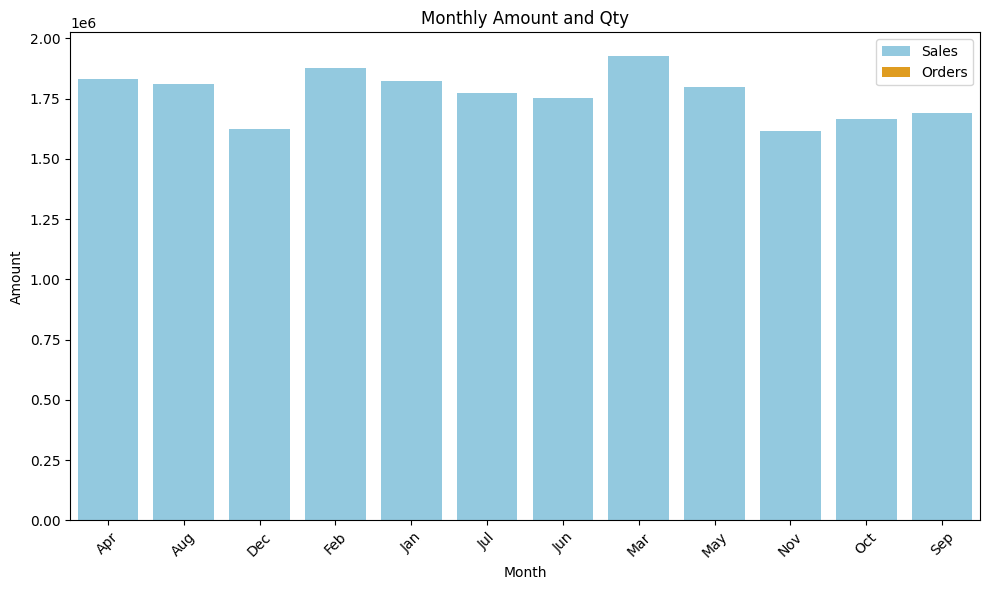

In [17]:
# Chart 1: Monthly Sales and Orders

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Month', y='Amount', color='skyblue', label='Sales')
sns.barplot(data=monthly_sales, x='Month', y='Qty', color='orange', label='Orders')
plt.title('Monthly Amount and Qty')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

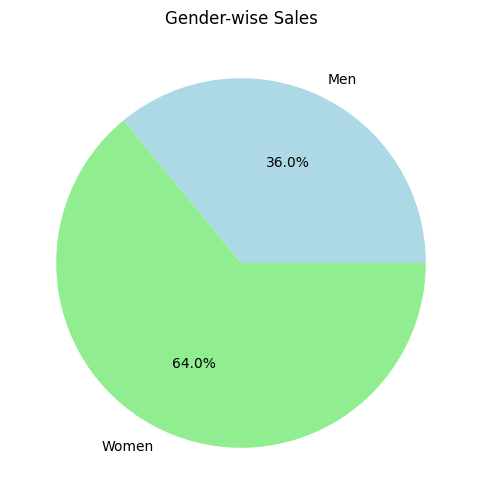

In [18]:
# Chart 2: Gender-wise Sales
plt.figure(figsize=(6, 6))
plt.pie(gender_sales['Amount'], labels=gender_sales['Gender'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Gender-wise Sales')
plt.show()